Importing the required data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
fp = '/content/drive/MyDrive/AAPL.csv'

Mounted at /content/drive


Importing the required libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

Converting the data into a dataframe and saving the relevant data which is going to be used for training and testing as data

In [5]:
df = pd.read_csv(fp)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-28,71.269997,71.457497,69.550003,69.644997,69.109299,112004800
1,2020-04-29,71.182503,72.417503,70.972504,71.932503,71.379196,137280800
2,2020-04-30,72.489998,73.632500,72.087502,73.449997,72.885025,183064000
3,2020-05-01,71.562500,74.750000,71.462502,72.267502,71.711632,240616800
4,2020-05-04,72.292503,73.422501,71.580002,73.290001,72.726265,133568000
5,2020-05-05,73.764999,75.250000,73.614998,74.389999,73.817802,147751200
6,2020-05-06,75.114998,75.809998,74.717499,75.157501,74.579391,142333600
7,2020-05-07,75.805000,76.292503,75.492500,75.934998,75.350914,115215200
8,2020-05-08,76.410004,77.587502,76.072502,77.532501,77.144394,134048000
9,2020-05-11,77.025002,79.262497,76.809998,78.752502,78.358284,145946400


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<ipython-input-8-239eab9cc44b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmatrix = df.corr()


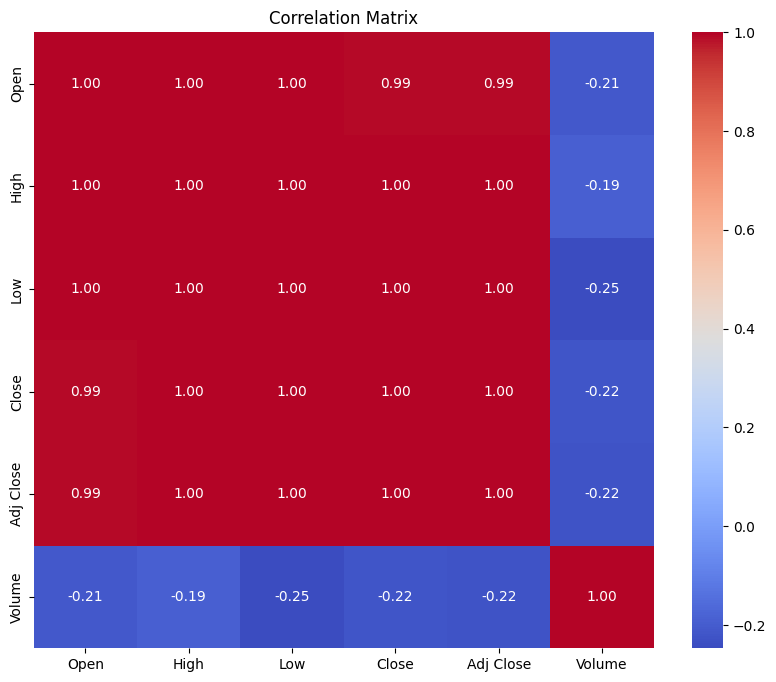

In [8]:
correlationmatrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationmatrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
data = df['Adj Close'].values.reshape(-1, 1)

Spliting the data in training and testing data

In [11]:
datascaler = MinMaxScaler()
normalizeddata = datascaler.fit_transform(data)
lengthofsequence = 10
X, Y = [], []
for i in range(len(normalizeddata) - lengthofsequence):
    X.append(normalizeddata[i:i+lengthofsequence])
    Y.append(normalizeddata[i+lengthofsequence])

X, Y = np.array(X), np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
def plotgraphs(actualdata , predicted ,residual):
    plt.plot(actualdata, color='red',label='Real Apple Stock Price')
    plt.plot(predicted, color='green',label='Predicted Apple Stock Price')
    plt.plot(residual, color='blue',label='Residual of Apple Stock Price')
    plt.title('Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

In [25]:
def rsme(y_test, pred):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    return print(rmse)

In [26]:
def mae(y_test, pred):
    mae = mean_absolute_error(y_test, pred)
    return print(mae)

Implementing the Simple RNN

In [15]:
rnnmodel = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(xtrain.shape[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SimpleRNN(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

rnnmodel.compile(optimizer='adam', loss='mean_squared_error')
rnnmodel.fit(xtrain, xtrain, epochs=100, batch_size=32, validation_data=(xtest, xtest))

Epoch 1/100
6/6 [==============================] - 7s 158ms/step - loss: 1.7361 - val_loss: 0.4189
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.8759 - val_loss: 0.3923
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.5634 - val_loss: 0.2840
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.3921 - val_loss: 0.2066
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 0.3944 - val_loss: 0.1548
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2425 - val_loss: 0.1292
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2205 - val_loss: 0.1085
Epoch 8/100
6/6 [==============================] - 0s 22ms/step - loss: 0.1409 - val_loss: 0.0959
Epoch 9/100
6/6 [==============================] - 0s 24ms/step - loss: 0.1258 - val_loss: 0.1005
Epoch 10/100
6/6 [==============================] - 0s 21ms/step - loss: 0.1392 - val_loss: 0.0970
Epoch 11/100
6/6 [

2/2 [==============================] - 2s 12ms/step


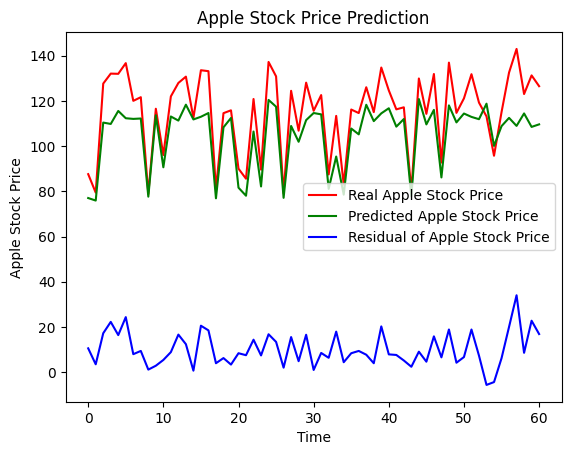

In [17]:
predictions1 = rnnmodel.predict(xtest)
predictions1 = datascaler.inverse_transform(predictions1)
ytest1 = datascaler.inverse_transform(ytest)
residuals1 = ytest1 - predictions1
plotgraphs(ytest1, predictions1, residuals1)

In [27]:
rsme(ytest1, predictions1)
mae(ytest1, predictions1)

12.622547816959845
10.51452340188749


Implementing LSTM RNN

In [29]:
lstmmodel = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(xtrain.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
lstmmodel.compile(optimizer='adam', loss='mean_squared_error')
lstmmodel.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
3/3 [==============================] - 7s 527ms/step - loss: 0.4181 - val_loss: 0.4059
Epoch 2/100
3/3 [==============================] - 0s 82ms/step - loss: 0.3742 - val_loss: 0.3509
Epoch 3/100
3/3 [==============================] - 0s 85ms/step - loss: 0.3135 - val_loss: 0.2726
Epoch 4/100
3/3 [==============================] - 0s 90ms/step - loss: 0.2284 - val_loss: 0.1618
Epoch 5/100
3/3 [==============================] - 0s 93ms/step - loss: 0.1153 - val_loss: 0.0367
Epoch 6/100
3/3 [==============================] - 0s 87ms/step - loss: 0.0505 - val_loss: 0.0590
Epoch 7/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0789 - val_loss: 0.0242
Epoch 8/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0418 - val_loss: 0.0341
Epoch 9/100
3/3 [==============================] - 0s 87ms/step - loss: 0.0472 - val_loss: 0.0485
Epoch 10/100
3/3 [==============================] - 0s 86ms/step - loss: 0.0542 - val_loss: 0.0458
Epoch 11/100
3/3 [

2/2 [==============================] - 1s 23ms/step


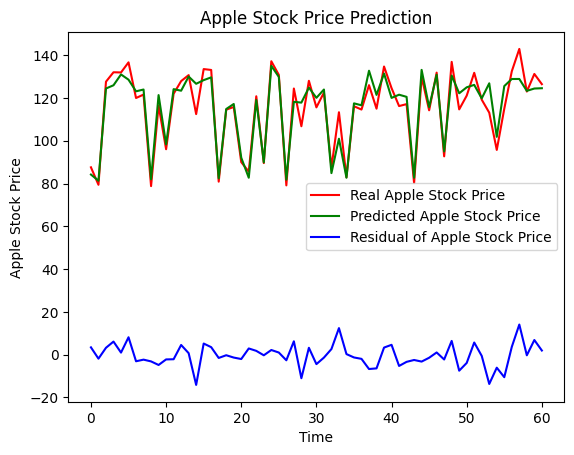

In [30]:
predictions2 = lstmmodel.predict(xtest)
predictions2 = datascaler.inverse_transform(predictions2)
ytest2 = datascaler.inverse_transform(ytest)
residuals2 = ytest2 - predictions2
plotgraphs(ytest2, predictions2, residuals2)

In [31]:
rsme(ytest2, predictions2)
mae(ytest2, predictions2)

5.383310897040731
4.131368125760439


Implementing the GRU model

In [32]:
grumodel = tf.keras.models.Sequential([
    tf.keras.layers.GRU(64, activation='relu', return_sequences=True, input_shape=(xtrain.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
grumodel.compile(optimizer='adam', loss='mean_squared_error')
grumodel.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
3/3 [==============================] - 13s 1s/step - loss: 0.4228 - val_loss: 0.4112
Epoch 2/100
3/3 [==============================] - 0s 101ms/step - loss: 0.3774 - val_loss: 0.3610
Epoch 3/100
3/3 [==============================] - 0s 60ms/step - loss: 0.3239 - val_loss: 0.2878
Epoch 4/100
3/3 [==============================] - 0s 65ms/step - loss: 0.2386 - val_loss: 0.1829
Epoch 5/100
3/3 [==============================] - 0s 126ms/step - loss: 0.1332 - val_loss: 0.0621
Epoch 6/100
3/3 [==============================] - 0s 129ms/step - loss: 0.0506 - val_loss: 0.0378
Epoch 7/100
3/3 [==============================] - 0s 129ms/step - loss: 0.0869 - val_loss: 0.0374
Epoch 8/100
3/3 [==============================] - 0s 122ms/step - loss: 0.0547 - val_loss: 0.0259
Epoch 9/100
3/3 [==============================] - 0s 116ms/step - loss: 0.0401 - val_loss: 0.0418
Epoch 10/100
3/3 [==============================] - 0s 103ms/step - loss: 0.0557 - val_loss: 0.0481
Epoch 11/100


2/2 [==============================] - 1s 10ms/step


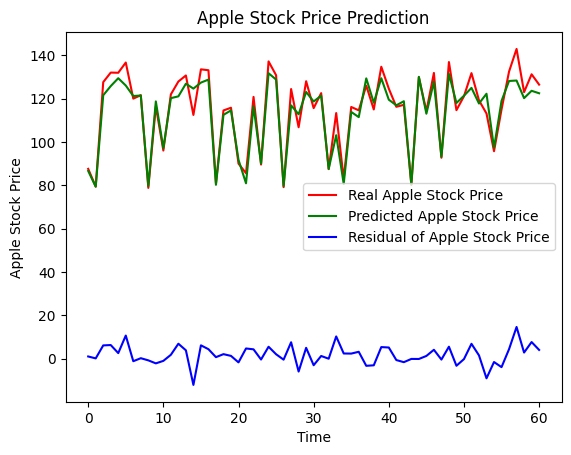

In [36]:
predictions3 = grumodel.predict(xtest)
predictions3 = datascaler.inverse_transform(predictions3)
ytest3 = datascaler.inverse_transform(ytest)
residuals3 = ytest3 - predictions3
plotgraphs(ytest3, predictions3, residuals3)

In [37]:
rsme(ytest3, predictions3)
mae(ytest3, predictions3)

4.808000686511219
3.6304153996942237


Implementing Bidirectional LSTM

In [39]:
bidirectionallstmmodel = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True), input_shape=(xtrain.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
bidirectionallstmmodel.compile(optimizer='adam', loss='mean_squared_error')
history = bidirectionallstmmodel.fit(xtrain, xtrain, epochs=100, batch_size=64, validation_data=(xtest, xtest))

Epoch 1/100
3/3 [==============================] - 12s 783ms/step - loss: 0.3955 - val_loss: 0.3766
Epoch 2/100
3/3 [==============================] - 0s 82ms/step - loss: 0.3378 - val_loss: 0.3016
Epoch 3/100
3/3 [==============================] - 0s 96ms/step - loss: 0.2526 - val_loss: 0.1831
Epoch 4/100
3/3 [==============================] - 0s 83ms/step - loss: 0.1265 - val_loss: 0.0335
Epoch 5/100
3/3 [==============================] - 0s 80ms/step - loss: 0.0516 - val_loss: 0.0582
Epoch 6/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0815 - val_loss: 0.0116
Epoch 7/100
3/3 [==============================] - 0s 102ms/step - loss: 0.0353 - val_loss: 0.0275
Epoch 8/100
3/3 [==============================] - 0s 84ms/step - loss: 0.0422 - val_loss: 0.0439
Epoch 9/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0508 - val_loss: 0.0365
Epoch 10/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0358 - val_loss: 0.0181
Epoch 11/100
3/3

2/2 [==============================] - 1s 15ms/step


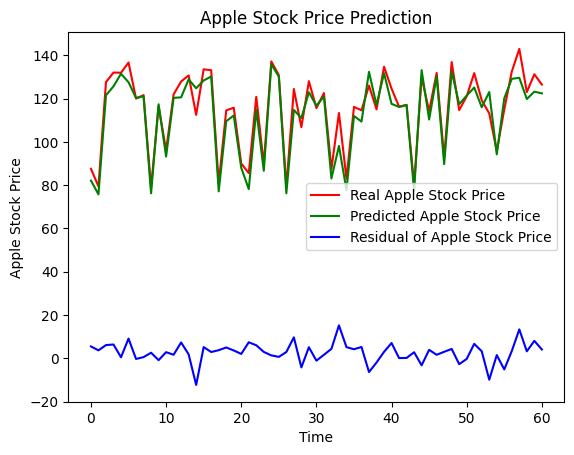

In [40]:
predictions4 = bidirectionallstmmodel.predict(xtest)
predictions4 = datascaler.inverse_transform(predictions4)
ytest4 = datascaler.inverse_transform(ytest)
residuals4 = ytest4 - predictions4
plotgraphs(ytest4, predictions4, residuals4)

In [41]:
rsme(ytest4, predictions4)
mae(ytest4, predictions4)

5.3276737294468886
4.257775764208186
